In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [187]:
data = pd.read_csv("C:/upei/Fall2021/visulization/project/heart_failure_clinical_records_dataset.csv", delimiter=',')
df = pd.DataFrame(data)
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


<BarContainer object of 299 artists>

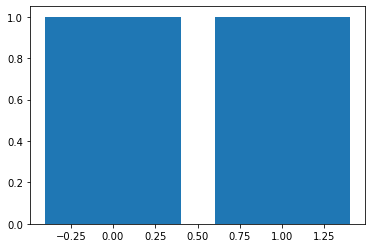

In [189]:
plt.bar(df['DEATH_EVENT'],df['anaemia'])

In [26]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

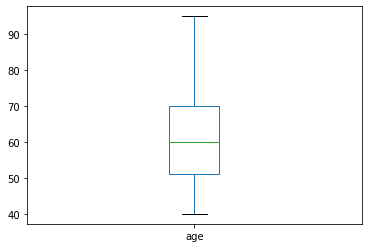

In [27]:
age_box = df.boxplot(column=['age'],grid=False)

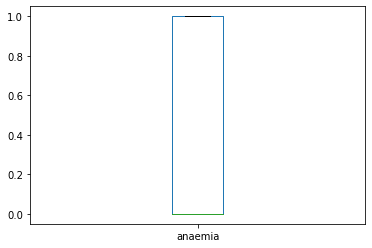

In [28]:
anaemia_box = df.boxplot(column=['anaemia'], grid=False)

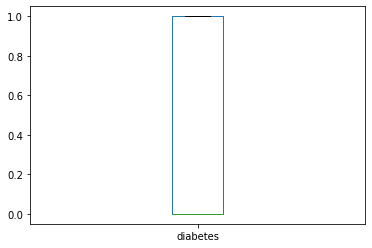

In [29]:
crea_box = df.boxplot(column=['diabetes'], grid=False)

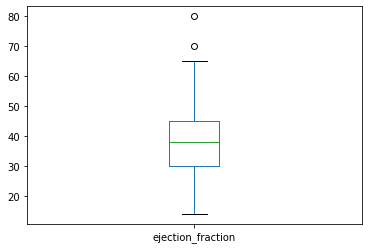

In [30]:
di_box = df.boxplot(column=['ejection_fraction'], grid=False)

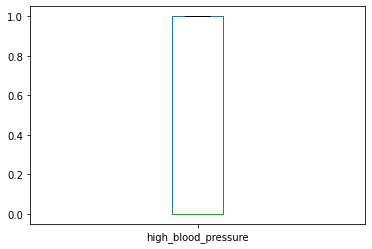

In [31]:
hi_box = df.boxplot(column=['high_blood_pressure'], grid=False)

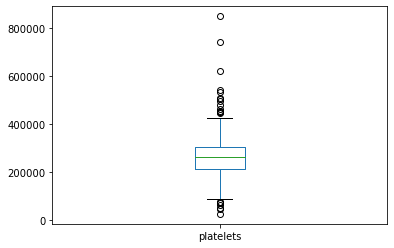

In [32]:
plat_box = df.boxplot(column=['platelets'], grid=False)

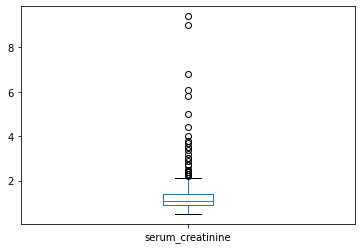

In [33]:
se_box = df.boxplot(column=['serum_creatinine'], grid=False)

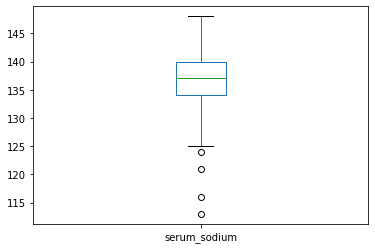

In [34]:
sodium_box = df.boxplot(column=['serum_sodium'], grid=False)

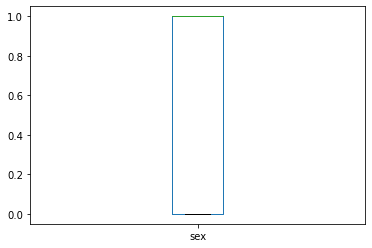

In [35]:
sex_box = df.boxplot(column=['sex'], grid=False)

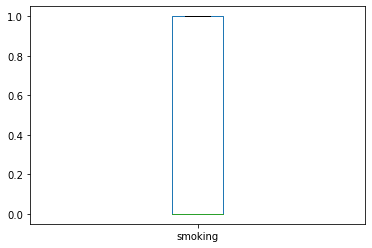

In [36]:
smok_box = df.boxplot(column=['smoking'], grid=False)

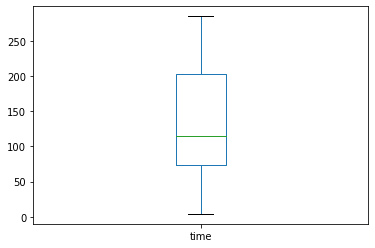

In [37]:
time_box = df.boxplot(column=['time'], grid=False)

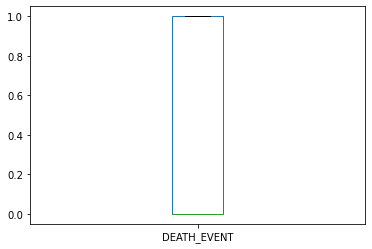

In [38]:
death_box = df.boxplot(column=['DEATH_EVENT'], grid=False)

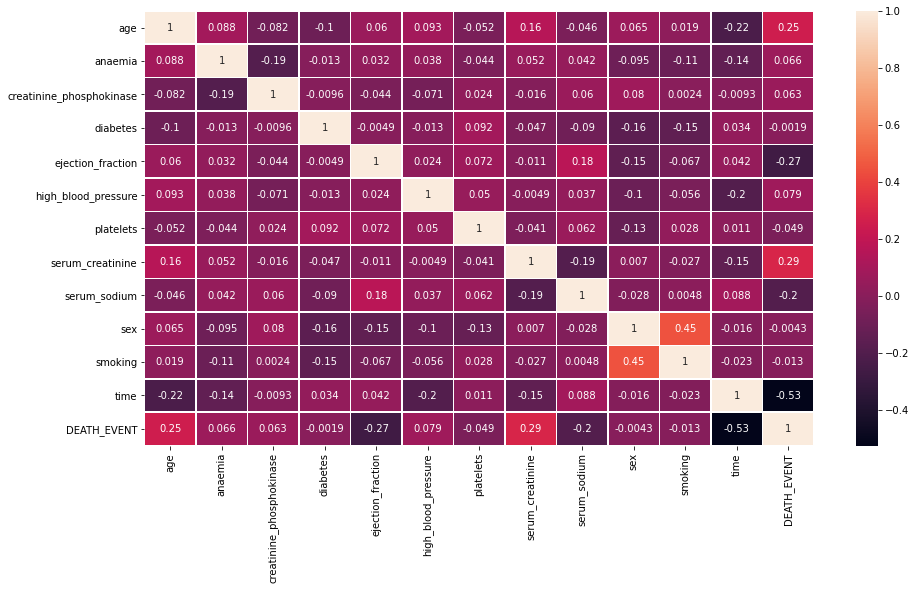

In [39]:
cor_matrix = df.corr()
map = sn.heatmap(cor_matrix, annot=True, linewidths= .5)
plt.gcf().set_size_inches(15, 8)

In [40]:
#categorize age
conditions = [
    (df['age'] < 65),
    (df['age'] >= 65) & (df['age'] < 75),
    (df['age'] >= 75) & (df['age'] < 85),
    (df['age'] >= 85)
]
 
values = ['young', 'middle old', 'old old', 'oldest']
df['cat_age'] = np.select(conditions, values)

In [41]:
young = df[df['cat_age'] == 'young']
middle = df[df['cat_age'] == 'middle old']
old = df[df['cat_age'] == 'old old']
oldest = df[df['cat_age'] == 'oldest']
print(oldest)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
5    90.0        1                        47         0                 40   
16   87.0        1                       149         0                 38   
26   95.0        1                       112         0                 40   
30   94.0        0                       582         1                 38   
31   85.0        0                        23         0                 45   
36   90.0        1                        60         1                 50   
55   95.0        1                       371         0                 30   
72   85.0        0                      5882         0                 35   
110  85.0        0                       129         0                 60   
117  85.0        1                       102         0                 60   
119  86.0        0                       582         0                 38   
158  85.0        1                       910         0                 50   

([<matplotlib.patches.Wedge at 0x1e46090e580>,
 [Text(0.7778174593052024, 0.7778174593052024, 'alive'),
  Text(-0.7778174593052025, -0.7778174593052023, 'death')])

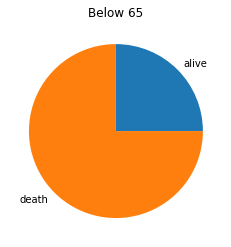

In [111]:
young_death = []
young_1 = len(young[young['DEATH_EVENT'] == 1])
young_0 = len(young['DEATH_EVENT']) - young_1
young_death.append(young_1)
young_death.append(young_0)
plt.title('Below 65')
plt.pie(young_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e460946730>,
 [Text(0.5364644163246991, 0.9603155366947886, 'alive'),
  Text(-0.5364643264134679, -0.9603155869222078, 'death')])

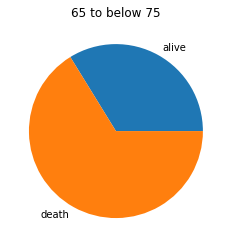

In [112]:
middle_death = []
middle_1 = len(middle[middle['DEATH_EVENT'] == 1])
middle_0 = len(middle['DEATH_EVENT']) - middle_1
middle_death.append(middle_1)
middle_death.append(middle_0)
plt.title('65 to below 75')
plt.pie(middle_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e4609890a0>,
 [Text(-0.1910130855889933, 1.083288512416601, 'alive'),
  Text(0.19101318701378264, -1.0832884945326604, 'death')])

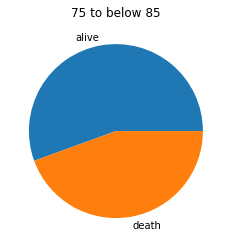

In [114]:
old_death = []
old_1 = len(old[old['DEATH_EVENT'] == 1])
old_0 = len(old['DEATH_EVENT']) - old_1
old_death.append(old_1)
old_death.append(old_0)
plt.title('75 to below 85')
plt.pie(old_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e4609bac10>,
 [Text(-0.6858388280562522, 0.8600145940217683, 'alive'),
  Text(0.6858389085766268, -0.8600145298088989, 'death')])

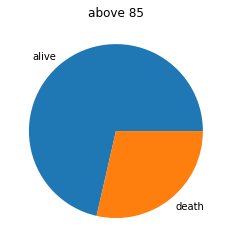

In [115]:
oldest_death = []
oldest_1 = len(oldest[oldest['DEATH_EVENT'] == 1])
oldest_0 = len(oldest['DEATH_EVENT']) - oldest_1
oldest_death.append(oldest_1)
oldest_death.append(oldest_0)
plt.title('above 85')
plt.pie(oldest_death, labels=['alive','death'])

In [46]:
an_1 = df[df['anaemia'] == 1]
an_0 = df[df['anaemia'] == 0]

([<matplotlib.patches.Wedge at 0x1e45da63850>,
 [Text(0.4789954067866398, 0.9902340128865003, 'alive'),
  Text(-0.47899540678663977, -0.9902340128865003, 'death')])

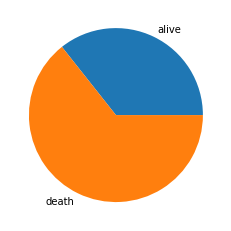

In [47]:
an1_death = []
an1_1 = len(an_1[an_1['DEATH_EVENT'] == 1])
an1_0 = len(an_1['DEATH_EVENT']) - an1_1
an1_death.append(an1_1)
an1_death.append(an1_0)
plt.pie(an1_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e45dac4d90>,
 [Text(0.6813932103477297, 0.8635411356108144, 'alive'),
  Text(-0.6813932103477297, -0.8635411356108144, 'death')])

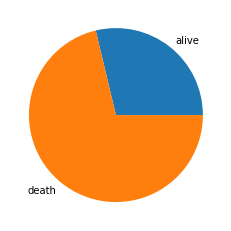

In [48]:
an0_death = []
an0_1 = len(an_0[an_0['DEATH_EVENT'] == 1])
an0_0 = len(an_0['DEATH_EVENT']) - an1_1
an0_death.append(an0_1)
an0_death.append(an0_0)
plt.pie(an0_death, labels=['alive','death'])

In [49]:
#categorize creatinine_phosphokinase
conditions = [
    (df['creatinine_phosphokinase'] <= 120),
    (df['creatinine_phosphokinase'] > 120)
]

values = ['normal', 'abnormal']
df['cat_creatinine_phosphokinase'] = np.select(conditions, values)
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [50]:
CPK_normal = df[df['cat_creatinine_phosphokinase'] == 'normal']
CPK_ab = df[df['cat_creatinine_phosphokinase'] == 'abnormal']

([<matplotlib.patches.Wedge at 0x1e46120b130>,
 [Text(0.7857105825523255, 0.7698434129518062, 'alive'),
  Text(-0.7857106546302646, -0.7698433393882689, 'death')])

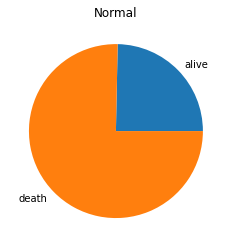

In [206]:
CPK_death = []
CPK_1 = len(CPK_normal[CPK_normal['DEATH_EVENT'] == 1])
CPK_0 = len(CPK_normal['DEATH_EVENT']) - CPK_1
CPK_death.append(CPK_1)
CPK_death.append(CPK_0)
plt.title('Normal')
plt.pie(CPK_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e4623a4070>,
 [Text(0.5090737495065858, 0.9751122589544786, 'alive'),
  Text(-0.5090736582099847, -0.9751123066173988, 'death')])

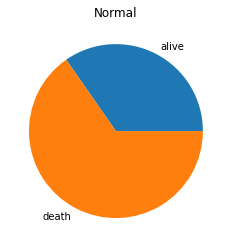

In [213]:
CPK_abDeath = []
CPK_ab1 = len(CPK_ab[CPK_ab['DEATH_EVENT'] == 1])
CPK_ab0 = len(CPK_ab['DEATH_EVENT']) - CPK_ab1
CPK_abDeath.append(CPK_ab1)
CPK_abDeath.append(CPK_ab0)
plt.title('Normal')
plt.pie(CPK_abDeath, labels=['alive','death'])

In [52]:
di_1 = df[df['diabetes'] == 1]
di_0 = df[df['diabetes'] == 0]

([<matplotlib.patches.Wedge at 0x1e46123f250>,
 [Text(0.5894094953465411, 0.928760704807937, 'alive'),
  Text(-0.5894094953465411, -0.928760704807937, 'death')])

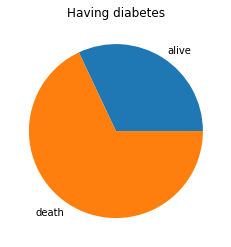

In [207]:
di1_death = []
di1_1 = len(di_1[di_1['DEATH_EVENT'] == 1])
di1_0 = len(di_1['DEATH_EVENT']) - di1_1
di1_death.append(di1_1)
di1_death.append(di1_0)
plt.title('Having diabetes')
plt.pie(di1_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e461272eb0>,
 [Text(0.5840335800327889, 0.932150619478464, 'alive'),
  Text(-0.5840335800327893, -0.9321506194784638, 'death')])

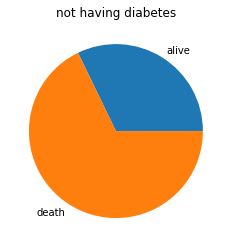

In [208]:
di0_death = []
di0_1 = len(di_0[di_0['DEATH_EVENT'] == 1])
di0_0 = len(di_0['DEATH_EVENT']) - di0_1
di0_death.append(di0_1)
di0_death.append(di0_0)
plt.title('not having diabetes')
plt.pie(di0_death, labels=['alive','death'])

In [55]:
#categorize diabetes
conditions = [
    (df['ejection_fraction'] < 50),
    (df['ejection_fraction'] >= 50)
]

values = ['low', 'normal']
df['cat_ejection_fraction'] = np.select(conditions, values)
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [56]:
di_normal = df[df['cat_ejection_fraction'] == 'normal']
di_low = df[df['cat_ejection_fraction'] == 'low']

([<matplotlib.patches.Wedge at 0x1e4612b1b50>,
 [Text(0.817459305728021, 0.7360436695459462, 'alive'),
  Text(-0.8174593401847112, -0.7360436312779133, 'death')])

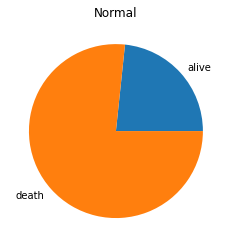

In [209]:
eNormal_death = []
ejection_1 = len(di_normal[di_normal['DEATH_EVENT'] == 1])
ejection_0 = len(di_normal['DEATH_EVENT']) - ejection_1
eNormal_death.append(ejection_1)
eNormal_death.append(ejection_0)
plt.title('Normal')
plt.pie(eNormal_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e4612f27f0>,
 [Text(0.5205278217513207, 0.9690463285018036, 'alive'),
  Text(-0.5205279124799833, -0.9690462797664676, 'death')])

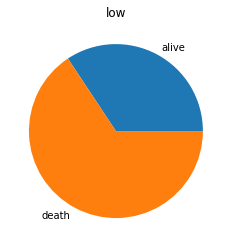

In [210]:
eLow_death = []
ejection_1 = len(di_low[di_low['DEATH_EVENT'] == 1])
ejection_0 = len(di_low['DEATH_EVENT']) - ejection_1
eLow_death.append(ejection_1)
eLow_death.append(ejection_0)
plt.title('low')
plt.pie(eLow_death, labels=['alive','death'])

In [59]:
blood_1 = df[df['high_blood_pressure'] == 1]
blood_0 = df[df['high_blood_pressure'] == 0]

([<matplotlib.patches.Wedge at 0x1e4623dcd90>,
 [Text(0.43232751046746465, 1.0114805602150763, 'alive'),
  Text(-0.4323274157658183, -1.0114806006924946, 'death')])

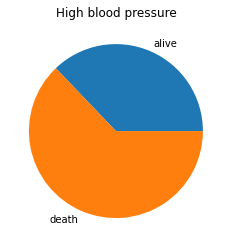

In [214]:
blood1_death = []
blood1_1 = len(blood_1[blood_1['DEATH_EVENT'] == 1])
blood1_0 = len(blood_1['DEATH_EVENT']) - blood1_1
blood1_death.append(blood1_1)
blood1_death.append(blood1_0)
plt.title('High blood pressure')
plt.pie(blood1_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e462419ee0>,
 [Text(0.6637340214685086, 0.8771870659929053, 'alive'),
  Text(-0.6637340214685088, -0.8771870659929051, 'death')])

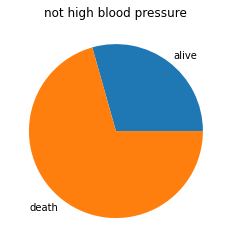

In [215]:
blood0_death = []
blood0_1 = len(blood_0[blood_0['DEATH_EVENT'] == 1])
blood0_0 = len(blood_0['DEATH_EVENT']) - blood0_1
blood0_death.append(blood0_1)
blood0_death.append(blood0_0)
plt.title('not high blood pressure')
plt.pie(blood0_death, labels=['alive','death'])

In [62]:
conditions = [
    (df['platelets'] < 150000),
    (df['platelets'] >= 150000) & (df['platelets'] <= 450000),
    (df['platelets'] > 450000)
]

values = ['low','normal','high']
df['cat_platelets'] = np.select(conditions, values)
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [63]:
pla_low = df[df['cat_platelets'] == 'low']
pla_normal = df[df['cat_platelets'] == 'normal']
pla_high = df[df['cat_platelets'] == 'high']

([<matplotlib.patches.Wedge at 0x1e462462760>,
 [Text(0.3154835705989099, 1.0537884591710818, 'alive'),
  Text(-0.3154835705989096, -1.053788459171082, 'death')])

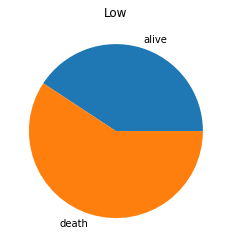

In [216]:
plaLow_death = []
plaLow_1 = len(pla_low[pla_low['DEATH_EVENT'] == 1])
plaLow_0 = len(pla_low['DEATH_EVENT']) - plaLow_1
plaLow_death.append(plaLow_1)
plaLow_death.append(plaLow_0)
plt.title('Low')
plt.pie(plaLow_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e46248d070>,
 [Text(0.6214881957031685, 0.9076080776423381, 'alive'),
  Text(-0.6214882806795672, -0.9076080194544095, 'death')])

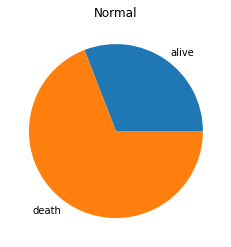

In [217]:
plaNormal_death = []
plaNormal_1 = len(pla_normal[pla_normal['DEATH_EVENT'] == 1])
plaNormal_0 = len(pla_normal['DEATH_EVENT']) - plaNormal_1
plaNormal_death.append(plaNormal_1)
plaNormal_death.append(plaNormal_0)
plt.title('Normal')
plt.pie(plaNormal_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e4624e1820>,
 [Text(0.6214881957031685, 0.9076080776423381, 'alive'),
  Text(-0.6214882806795672, -0.9076080194544095, 'death')])

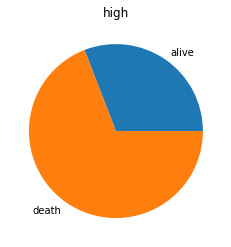

In [218]:
plaHigh_death = []
plaHigh_1 = len(pla_high[pla_high['DEATH_EVENT'] == 1])
plaHigh_0 = len(pla_high['DEATH_EVENT']) - plaHigh_1
plaHigh_death.append(plaNormal_1)
plaHigh_death.append(plaNormal_0)
plt.title('high')
plt.pie(plaHigh_death, labels=['alive','death'])

In [67]:
conditions = [
    (df['serum_creatinine'] < 0.6),
    (df['serum_creatinine'] >= 0.6) & (df['serum_creatinine'] <= 1.2),
    (df['serum_creatinine'] > 1.2)
]

values = ['low','normal','high']
df['cat_serum_creatinine'] = np.select(conditions, values)
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [68]:
serum_low = df[df['cat_serum_creatinine'] == 'low']
serum_normal = df[df['cat_serum_creatinine'] == 'normal']
serum_high = df[df['cat_serum_creatinine'] == 'high']
print(serum_low['DEATH_EVENT'])

250    0
Name: DEATH_EVENT, dtype: int64


([<matplotlib.patches.Wedge at 0x1e460b01670>,
 [Text(1.1, 0.0, 'alive'), Text(-1.1, 1.3471114790620887e-16, 'death')])

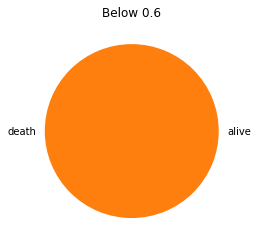

In [120]:
SeLow_death = []
SeLow_1 = len(serum_low[serum_low['DEATH_EVENT'] == 1])
SeLow_0 = len(serum_low['DEATH_EVENT']) - SeLow_1
SeLow_death.append(SeLow_1)
SeLow_death.append(SeLow_0)
plt.title('Low')
plt.pie(SeLow_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e460bb8d30>,
 [Text(0.8623532732881823, 0.6828959159704777, 'alive'),
  Text(-0.8623532093508486, -0.6828959967098149, 'death')])

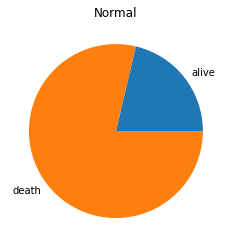

In [123]:
SeNormal_death = []
Senormal_1 = len(serum_normal[serum_normal['DEATH_EVENT'] == 1])
SeNormal_0 = len(serum_normal['DEATH_EVENT']) - Senormal_1
SeNormal_death.append(Senormal_1)
SeNormal_death.append(SeNormal_0)
plt.title('0.6 to 1.2')
plt.pie(SeNormal_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e460ce76a0>,
 [Text(0.07639317840216295, 1.0973441038678868, 'alive'),
  Text(-0.07639328114293277, -1.0973440967154364, 'death')])

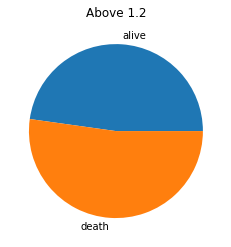

In [125]:
High_death = []
High_1 = len(serum_high[serum_high['DEATH_EVENT'] == 1])
high_0 = len(serum_high['DEATH_EVENT']) - Senormal_1
High_death.append(High_1)
High_death.append(high_0)
plt.title('Above 1.2')
plt.pie(High_death, labels=['alive','death'])

## SeHigh_death = []
SeHigh_1 = len(serum_high[serum_high['DEATH_EVENT'] == 1])
SeHigh_0 = len(serum_high['DEATH_EVENT']) - SeHigh_1
SeHigh_death.append(SeHigh_1)
SeHigh_death.append(SeHigh_0)
plt.title('High')
plt.pie(SeHigh_death, labels=['alive','death'])

In [72]:
sex_1 = df[df['sex'] == 1]
sex_0 = df[df['sex'] == 0]

([<matplotlib.patches.Wedge at 0x1e460d292e0>,
 [Text(0.5906122223642442, 0.9279963377050413, 'alive'),
  Text(-0.5906123092495297, -0.9279962824079299, 'death')])

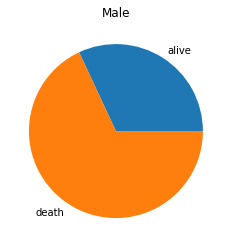

In [126]:
Sex1_death = []
Sex1_1 = len(sex_1[sex_1['DEATH_EVENT'] == 1])
Sex1_0 = len(sex_1['DEATH_EVENT']) - Sex1_1
Sex1_death.append(Sex1_1)
Sex1_death.append(Sex1_0)
plt.title('Male')
plt.pie(Sex1_death, labels=['alive','death'])

([<matplotlib.patches.Wedge at 0x1e460d63880>,
 [Text(6.735557395310444e-17, 1.1, 'alive'),
  Text(-2.0206672185931328e-16, -1.1, 'death')])

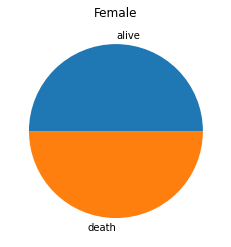

In [128]:
Sex0_death = []
Sex0_1 = len(sex_0[sex_0['DEATH_EVENT'] == 1])
Sex0_0 = len(sex_0['DEATH_EVENT']) - Sex0_1
Sex0_death.append(Sex0_1)
Sex0_death.append(Sex0_1)
plt.title('Female')
plt.pie(Sex0_death, labels=['alive','death'])

In [75]:
smoke_1 = df[df['smoking'] == 1]
smoke_0 = df[df['smoking'] == 0]
print(smoke_1)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
2    65.0        0                       146         0                 20   
5    90.0        1                        47         0                 40   
7    60.0        1                       315         1                 60   
9    80.0        1                       123         0                 35   
10   75.0        1                        81         0                 38   
..    ...      ...                       ...       ...                ...   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

[30, 66]


([<matplotlib.patches.Wedge at 0x1e460878370>,
 [Text(6.735557395310444e-17, 1.1, 'alive'),
  Text(-2.0206672185931328e-16, -1.1, 'death')])

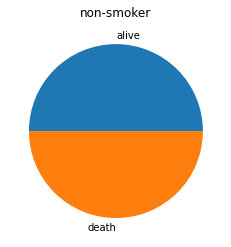

In [133]:
Smoke0_death = []
Smoke0_1 = len(smoke_0[smoke_0['DEATH_EVENT'] == 1])
Smoke0_0 = len(smoke_1['DEATH_EVENT']) - Smoke1_1
Smoke0_death.append(Smoke0_1)
Smoke0_death.append(Smoke0_0)
print(Smoke1_death)
plt.title('non-smoker')
plt.pie(Smoke0_death, labels=['alive','death'])

[30, 66]


([<matplotlib.patches.Wedge at 0x1e45de0e6a0>,
 [Text(0.6111272563215626, 0.9146165735327998, 'alive'),
  Text(-0.6111272563215624, -0.9146165735327998, 'death')])

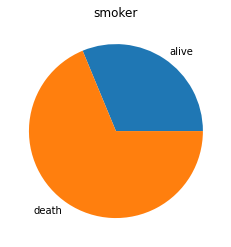

In [134]:
Smoke1_death = []
Smoke1_1 = len(smoke_1[smoke_1['DEATH_EVENT'] == 1])
Smoke1_0 = len(smoke_1['DEATH_EVENT']) - Smoke1_1
Smoke1_death.append(Smoke1_1)
Smoke1_death.append(Smoke1_0)
print(Smoke1_death)
plt.title('smoker')
plt.pie(Smoke1_death, labels=['alive','death'])

In [77]:
conditions = [
    (df['time'])<= 30,
    (df['time'] > 30) & (df['time'] <= 180),
    (df['time'] >= 180)
]

values = ['1','2','3']
df['cat_time'] = np.select(conditions, values)
print()

In [78]:
X = df.drop(['DEATH_EVENT','cat_age','cat_creatinine_phosphokinase', 'cat_ejection_fraction', 'cat_platelets','cat_serum_creatinine','cat_time'], axis =1)
Y = df['DEATH_EVENT']
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [79]:
time_low = df[df['cat_time'] == '1']
time_normal = df[df['cat_time'] == '2']
time_high = df[df['cat_time'] == '3']
print(time_low['DEATH_EVENT'])

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    0
15    1
16    1
17    1
18    1
19    1
20    0
21    1
22    1
23    0
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    0
34    1
35    1
36    1
37    1
38    0
39    1
Name: DEATH_EVENT, dtype: int64


age                             40
anaemia                         40
creatinine_phosphokinase        40
diabetes                        40
ejection_fraction               40
high_blood_pressure             40
platelets                       40
serum_creatinine                40
serum_sodium                    40
sex                             40
smoking                         40
time                            40
DEATH_EVENT                     40
cat_age                         40
cat_creatinine_phosphokinase    40
cat_ejection_fraction           40
cat_platelets                   40
cat_serum_creatinine            40
cat_time                        40
dtype: int64


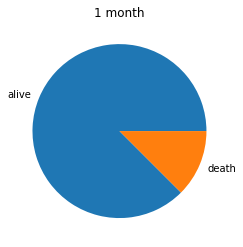

In [116]:
time_death = []
low_1 = len(time_low[time_low['DEATH_EVENT'] == 1])
low_0 = len(time_low['DEATH_EVENT']) - low_1
time_death.append(low_1)
time_death.append(low_0)
plt.title('1 month')
plt.pie(time_death, labels=['alive','death'])
print(time_low.count())

[54, 121]
    cat_time  DEATH_EVENT
40         2            1
41         2            1
42         2            1
43         2            0
44         2            1
..       ...          ...
191        2            0
192        2            0
193        2            0
194        2            1
195        2            1

[156 rows x 2 columns]


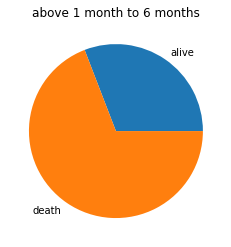

In [117]:
time_death = []
normal_1 = len(time_normal[time_normal['DEATH_EVENT'] == 1])
normal_0 = len(time_normal['DEATH_EVENT']) - low_1
time_death.append(normal_1)
time_death.append(normal_0)
print(time_death)
plt.title('Above 1 month to 6 months')
plt.pie(time_death, labels=['alive','death'])
print(time_normal[['cat_time','DEATH_EVENT']])

[7, 68]
    cat_time  DEATH_EVENT
196        3            0
197        3            0
198        3            0
199        3            0
200        3            0
..       ...          ...
294        3            0
295        3            0
296        3            0
297        3            0
298        3            0

[103 rows x 2 columns]


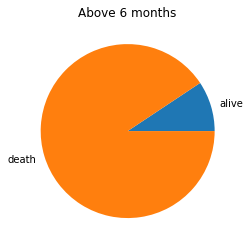

In [119]:
time_death = []
long_1 = len(time_high[time_high['DEATH_EVENT'] == 1])
long_0 = len(time_high['DEATH_EVENT']) - low_1
time_death.append(long_1)
time_death.append(long_0)
print(time_death)
plt.title('Above 6 months')
plt.pie(time_death, labels=['alive','death'])
print(time_high[['cat_time','DEATH_EVENT']])

In [83]:
def randomForrest(X,Y):
    clf=RandomForestClassifier(n_estimators=100)
    scores = cross_val_score(clf, X, Y, cv=10)
    print(np.average(scores))

In [84]:
randomForrest(X,Y)

0.7689655172413794


In [85]:
train, test, train_labels, test_labels = train_test_split(X, Y, test_size = 0.1)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train, train_labels)
importance = rf.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

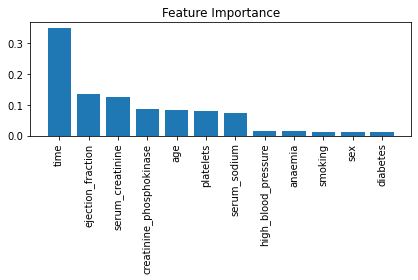

In [86]:
plt.title('Feature Importance')
plt.bar(range(train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

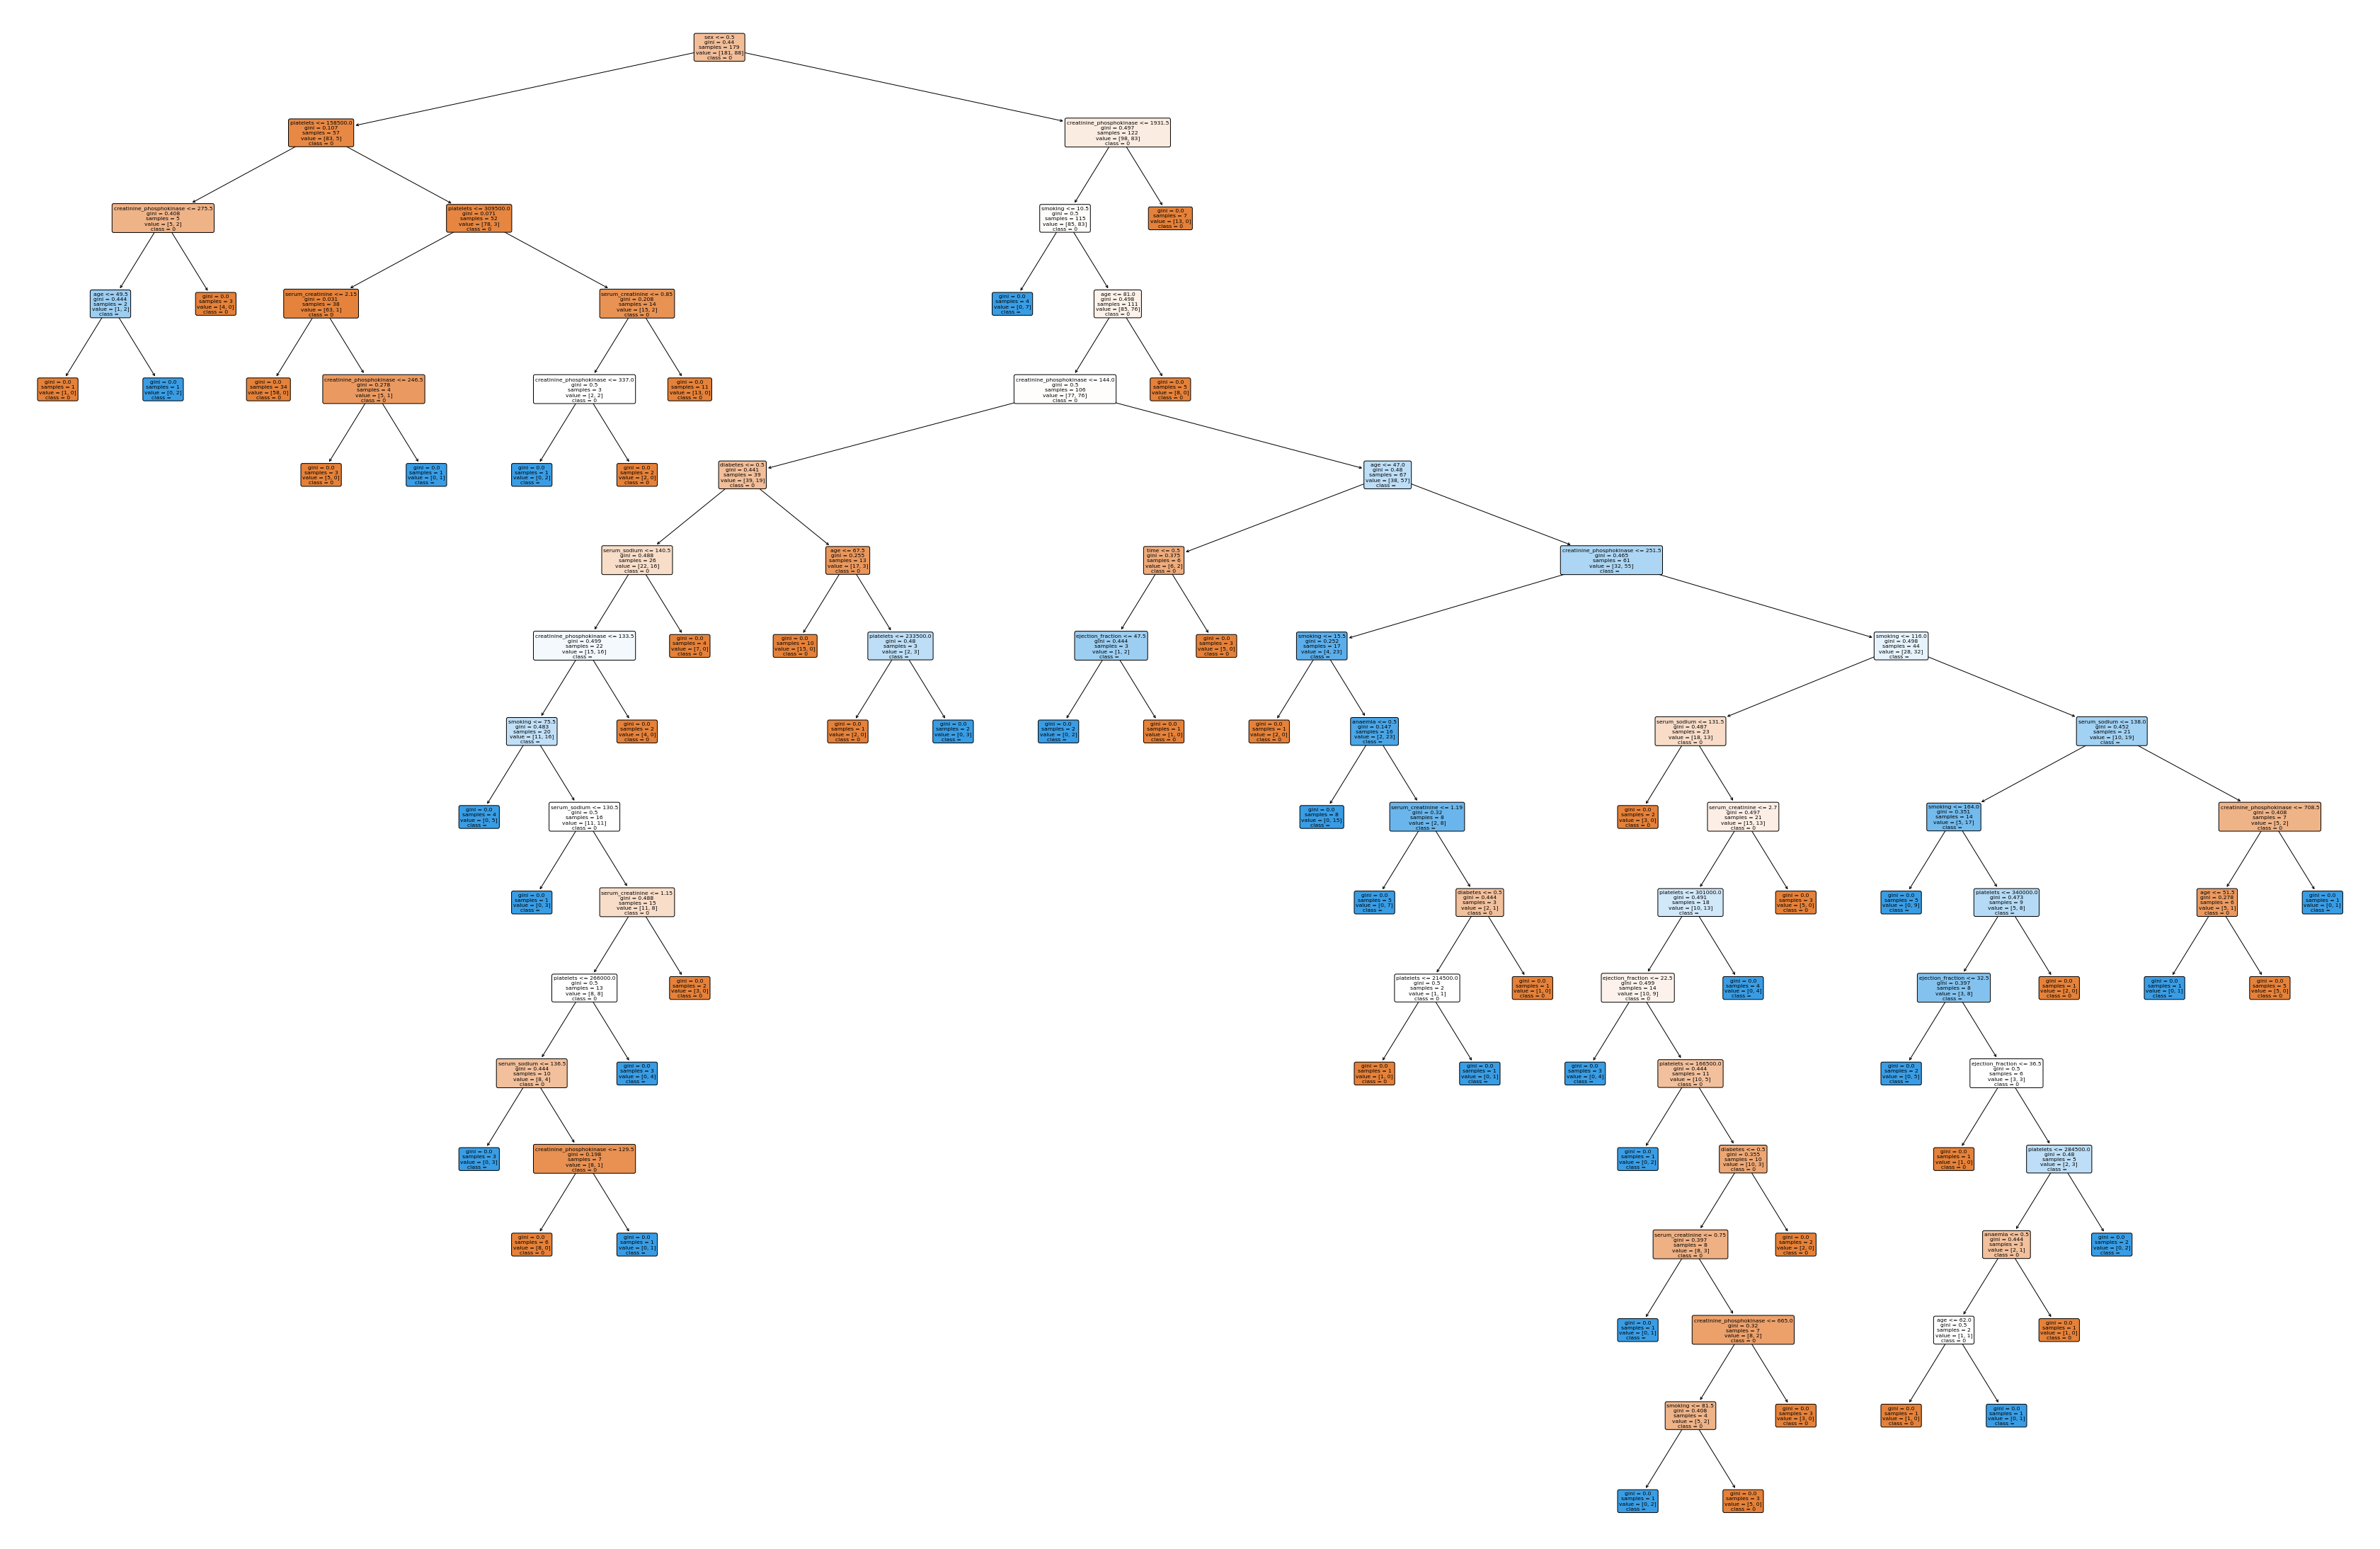

In [186]:
fig = plt.figure(figsize=(60,40))
tree.plot_tree(rf.estimators_[1], 
          feature_names=X.columns,
          class_names=str(Y), 
          filled=True, impurity=True, 
          rounded=True)
plt.show()

In [88]:
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [89]:
X_check = X.drop('time', axis=1)
randomForrest(X_check,Y)

0.7326436781609196


In [90]:
X_check_2 = X.drop('ejection_fraction', axis =1)
randomForrest(X_check_2,Y)

0.7722988505747127


In [91]:
X_check_1 = X.drop('serum_creatinine', axis =1)
randomForrest(X_check_1,Y)

0.7489655172413793


In [92]:
X_check_1 = X.drop('creatinine_phosphokinase', axis =1)
randomForrest(X_check_1,Y)

0.7589655172413792


In [93]:
X_check_1 = X.drop('smoking', axis =1)
randomForrest(X_check_1,Y)

0.765632183908046


In [94]:
X_check_1 = X.drop('diabetes', axis =1)
randomForrest(X_check_1,Y)

0.7622988505747127


In [95]:
X_check_1 = X.drop('sex', axis =1)
randomForrest(X_check_1,Y)

0.7522988505747126


In [96]:
X_smoke = df[df['smoking'] == 1]
new_Y = X_smoke['DEATH_EVENT']
new_X = X_smoke.drop(['DEATH_EVENT','smoking','cat_age','cat_creatinine_phosphokinase', 'cat_ejection_fraction', 'cat_platelets','cat_serum_creatinine','cat_time'], axis =1)

In [97]:
randomForrest(new_X,new_Y)

0.7911111111111111


In [98]:
train, test, train_labels, test_labels = train_test_split(new_X, new_Y, test_size = 0.1)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train, train_labels)
importance = rf.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

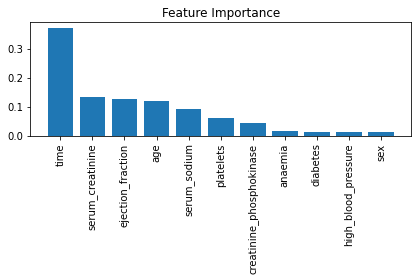

In [99]:
plt.title('Feature Importance')
plt.bar(range(train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(train.shape[1]), new_X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [100]:
sex_smoke = df[df['smoking'] == 1]
sex_Y = X_smoke['DEATH_EVENT']
sex_X = X_smoke.drop(['sex','DEATH_EVENT','smoking','cat_age','cat_creatinine_phosphokinase', 'cat_ejection_fraction', 'cat_platelets','cat_serum_creatinine','cat_time'], axis =1)

In [101]:
randomForrest(sex_X,sex_Y)

0.78


In [102]:
smoke_Y = df['smoking']
smoke_X = df.drop(['smoking','cat_age','cat_creatinine_phosphokinase', 'cat_ejection_fraction', 'cat_platelets','cat_serum_creatinine','cat_time'], axis =1)

In [103]:
print(smoke_X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [104]:
randomForrest(smoke_X,smoke_Y)

0.6355172413793102


In [105]:
train, test, train_labels, test_labels = train_test_split(smoke_X, smoke_Y, test_size = 0.1)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(train, train_labels)
importance = rf.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

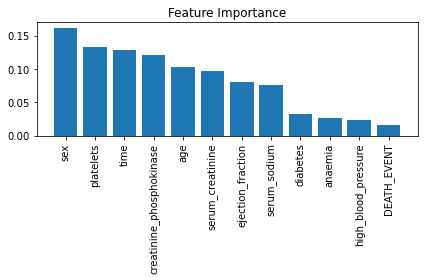

In [106]:
plt.title('Feature Importance')
plt.bar(range(train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(train.shape[1]), smoke_X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [107]:
logis = LogisticRegression(solver='liblinear', random_state=0)
scores = cross_val_score(logis, X, Y, cv=10)
print(np.average(scores))

0.7922988505747126


In [155]:
time= df
X_time = time.drop(['time','DEATH_EVENT','cat_age','cat_creatinine_phosphokinase', 'cat_ejection_fraction', 'cat_platelets','cat_serum_creatinine','cat_time'], axis =1)
Y_time = time['time']
print(Y_time)

0        4
1        6
2        7
3        7
4        8
      ... 
294    270
295    271
296    278
297    280
298    285
Name: time, Length: 299, dtype: int64


In [156]:
conditions = [
    (Y_time <= 30),
    (Y_time > 30) & (Y_time <= 180),
    (Y_time > 180)
]

values = ['1 month','Above 1 month to 6 months','Above 6 months']
Y_time = np.select(conditions, values)
print(Y_time)

['1 month' '1 month' '1 month' '1 month' '1 month' '1 month' '1 month'
 '1 month' '1 month' '1 month' '1 month' '1 month' '1 month' '1 month'
 '1 month' '1 month' '1 month' '1 month' '1 month' '1 month' '1 month'
 '1 month' '1 month' '1 month' '1 month' '1 month' '1 month' '1 month'
 '1 month' '1 month' '1 month' '1 month' '1 month' '1 month' '1 month'
 '1 month' '1 month' '1 month' '1 month' '1 month'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 months' 'Above 1 month to 6 months'
 'Above 1 month to 6 mon

In [110]:
randomForrest(X_time,Y_time)

0.4917241379310345


(array([ 40.,   0.,   0.,   0.,   0., 156.,   0.,   0.,   0., 103.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

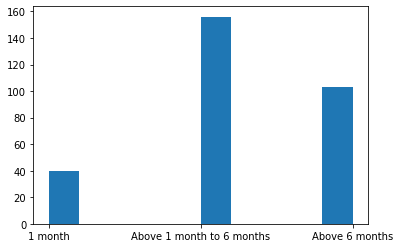

In [146]:
plt.hist(Y_time)

In [182]:
time= df
X_time = time.drop(['time','DEATH_EVENT','cat_age','cat_creatinine_phosphokinase', 'cat_ejection_fraction', 'cat_platelets','cat_serum_creatinine','cat_time'], axis =1)
Y_time = time['time']
print(Y_time)

0        4
1        6
2        7
3        7
4        8
      ... 
294    270
295    271
296    278
297    280
298    285
Name: time, Length: 299, dtype: int64


In [183]:
conditions = [
    (Y_time <= 180),
    (Y_time > 180)
]

values = ['First 6 months','over 6 months']
Y_time = np.select(conditions, values)
print(Y_time)

['First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months' 'First 6 months' 'First 6 months'
 'First 6 months' 'First 6 months'

(array([196.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 103.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

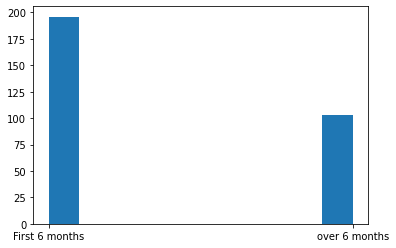

In [184]:
plt.hist(Y_time)


In [180]:
randomForrest(X_time,Y_time)

0.6254022988505746
